<h1>Foundational Components of Neural Networks<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Perceptron:-The-Simplest-Neural-Network" data-toc-modified-id="The-Perceptron:-The-Simplest-Neural-Network-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Perceptron: The Simplest Neural Network</a></span></li><li><span><a href="#Activation-Functions" data-toc-modified-id="Activation-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Activation Functions</a></span><ul class="toc-item"><li><span><a href="#Sigmoid" data-toc-modified-id="Sigmoid-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sigmoid</a></span></li><li><span><a href="#Tanh" data-toc-modified-id="Tanh-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Tanh</a></span></li><li><span><a href="#ReLU-(Rectified-Linear-Unit)" data-toc-modified-id="ReLU-(Rectified-Linear-Unit)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>ReLU (Rectified Linear Unit)</a></span></li><li><span><a href="#Softmax" data-toc-modified-id="Softmax-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Softmax</a></span></li></ul></li><li><span><a href="#Loss-Functions" data-toc-modified-id="Loss-Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loss Functions</a></span><ul class="toc-item"><li><span><a href="#Mean-Squared-Error-Loss" data-toc-modified-id="Mean-Squared-Error-Loss-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Mean Squared Error Loss</a></span></li><li><span><a href="#Categorical-Cross-Entropy-Loss" data-toc-modified-id="Categorical-Cross-Entropy-Loss-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Categorical Cross-Entropy Loss</a></span></li><li><span><a href="#Binary-Cross-Entropy-Loss" data-toc-modified-id="Binary-Cross-Entropy-Loss-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Binary Cross-Entropy Loss</a></span></li></ul></li><li><span><a href="#Diving-Deep-into-Supervised-Training" data-toc-modified-id="Diving-Deep-into-Supervised-Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Diving Deep into Supervised Training</a></span><ul class="toc-item"><li><span><a href="#Constructing-Toy-Data" data-toc-modified-id="Constructing-Toy-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Constructing Toy Data</a></span><ul class="toc-item"><li><span><a href="#Problem-Solving-Steps" data-toc-modified-id="Problem-Solving-Steps-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Problem Solving Steps</a></span></li></ul></li><li><span><a href="#Putting-it-Together:-Gradient-Bases-Supervised-Learning" data-toc-modified-id="Putting-it-Together:-Gradient-Bases-Supervised-Learning-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Putting it Together: Gradient Bases Supervised Learning</a></span></li></ul></li><li><span><a href="#Auxiliary-Training-Concepts" data-toc-modified-id="Auxiliary-Training-Concepts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Auxiliary Training Concepts</a></span></li><li><span><a href="#Example:-Classifying-Sentiment-of-Restaurant-Reviews" data-toc-modified-id="Example:-Classifying-Sentiment-of-Restaurant-Reviews-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Example: Classifying Sentiment of Restaurant Reviews</a></span><ul class="toc-item"><li><span><a href="#The-Yelp-Review-Dataset" data-toc-modified-id="The-Yelp-Review-Dataset-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>The Yelp Review Dataset</a></span></li><li><span><a href="#Understaing-PyTorch's-Dataset-Representation" data-toc-modified-id="Understaing-PyTorch's-Dataset-Representation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Understaing PyTorch's Dataset Representation</a></span></li><li><span><a href="#The-Vocabulary,-the-Vectorizer-and-the-DataLoader" data-toc-modified-id="The-Vocabulary,-the-Vectorizer-and-the-DataLoader-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>The Vocabulary, the Vectorizer and the DataLoader</a></span></li></ul></li></ul></div>

## The Perceptron: The Simplest Neural Network

_Perceptron_ is the simplest neural network unit. It was loosely modeled after the biological neuron. It has input and output and data flow from inputs to the outputs similar to biological neuron.

<img src="../images/figure_3_1.png" />

**Each Perceptron unit has following components:**

- _Input_ ($ x $)
- _Output_ ($ y $)
- _Weights_ ($ w $)
- _Bias_ ($ b $)
- _Activation Function_ ($ f $)

Weights & bias are learned from the data & activation function is handpicked depending on network and target outputs.

Mathematically this can expressed as following:

$$ y = f(wx + b) $$

Activation function is typically a non linear function and $ wx + b $ is a linear function hence a Perceptron is a _composition of a linear and nonlinear function_. The linear expression $ wx + b $ is also known as an _affine transform_.

In [1]:
# Implementing a perceptron using PyTorch
%load_ext nb_black

import torch
import torch.nn as nn


class Perceptron(nn.Module):
    """
    A Perceptron is one Linear Layer.
    """

    def __init__(self, input_dim):
        """
        Args:
            input_dim(int): Size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        """
        The forward pass of the Perceptron.

        Args:
            x_in(torch.Tensor): an input data tensor x_in.shape
            should be (batch, num_features).
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

<IPython.core.display.Javascript object>

## Activation Functions

Activation functions are nonlinearities introduced in a neural network to capture complex relationships in data.

### Sigmoid

Sigmoid takes any real value and squashes it into the range $ [0, 1] $. 

Mathematically sigmoid function is expressed as follows:

$$ f(x) = \frac {1}{1 + e^{-x}} $$

Sigmoid function saturates very quickly and for a majority of the inputs. This can lead to _vanishing gradient problem(gradient becoming 0)_ and _exploring gradient problem(overflowing floating point value)_. 

Due to this sigmoid is rarely used in network units rather it is used at output where output are required to be interpreted as probabilities.


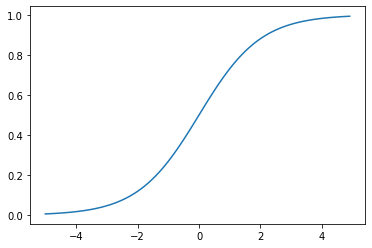

<IPython.core.display.Javascript object>

In [2]:
# Sigmoid activation example

import torch
import matplotlib.pyplot as plt

x = torch.arange(-5.0, 5.0, 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

### Tanh

The tanh activation function is a cosmetically different variant of the sigmoid and it is simply a linear transform of the sigmoid function. 

Tanh is also a squashing function as it maps real values form $ [-\infty, +\infty] $ to the range $ [-1, +1] $.

Mathematically, tanh can be expressed as following:

$$ f(x) = \tanh x = \frac {e^x - e^{-x}}{e^x + e^{-x}}$$

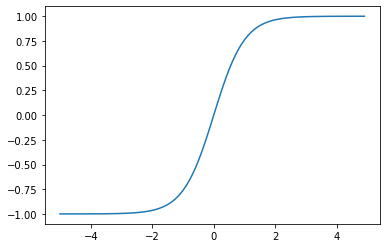

<IPython.core.display.Javascript object>

In [3]:
# Tanh activation example

import torch
import matplotlib.pyplot as plt

x = torch.arange(-5.0, 5.0, 0.1)
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

### ReLU (Rectified Linear Unit)

ReLU unit clips the negative values to zero and it can be expressed as following:

$$ f(x) = max(0, x) $$

ReLU can be impacted by _dying ReLU problem_ as some certrain outputs in the network can simply become zero and never revive again.

To mitigate this effect, variants such as _Leaky ReLU and Parameteric ReLU(PReLU)_ activation functions have been proposed where the lead coefficient $ a $ is a learned paremeter. It can expressed as:

$$ f(x) = max(x, ax) $$

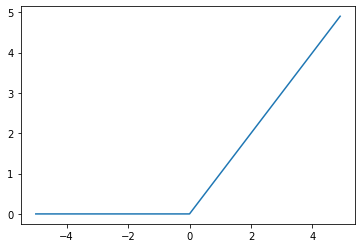

<IPython.core.display.Javascript object>

In [4]:
# ReLU activation example

import torch
import matplotlib.pyplot as plt

relu = torch.nn.ReLU()
x = torch.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

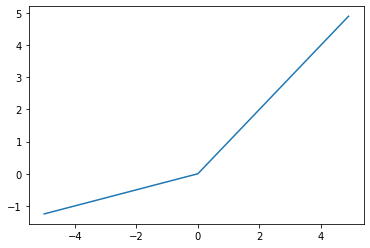

<IPython.core.display.Javascript object>

In [5]:
# PReLU activation example

import torch
import matplotlib.pyplot as plt

prelu = torch.nn.PReLU(num_parameters=1)
x = torch.arange(-5.0, 5.0, 0.1)
y = prelu(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.show()

### Softmax

Softmax function also squashes the output betweem $ [0, 1] $ range. It also divides each output by the sum of all the outputs, whcih gives us a discrete probability distribution over k possible classes.

This can be expressed as:

$$ softmax(x_i) = \frac {e^{x_i}} { \sum_{j=1}^h e^{x_j}} $$

In [6]:
# Softmax activation Example

import torch

softmax = torch.nn.Softmax(dim=1)
x = torch.randn(1, 3)
y = softmax(x)
print(x)
print(y)
print(torch.sum(y, dim=1))

tensor([[-0.9320,  0.5297,  1.4151]])
tensor([[0.0634, 0.2735, 0.6631]])
tensor([1.])


<IPython.core.display.Javascript object>

## Loss Functions

Loss functions help guide the training algorithm to pick the right parameters by using the data. Loss function takes a truth($ y $) and a prediction( $ \hat y $) as an input and produced a real values score. The lower the score, better the model prediction is.

### Mean Squared Error Loss

The MSE is simply the average of the squares of the difference between the predicted & target values.

It can expressed as followings:

$$ L_{mse} (y, \hat y) = \frac {1}{n} \sum_{i=1}^n (y - \hat y)^2$$

In [7]:
# MSE Loss

import torch
import torch.nn as nn

mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(1.7538, grad_fn=<MseLossBackward>)


<IPython.core.display.Javascript object>

### Categorical Cross-Entropy Loss

The catehorical cross-entropy is used in a multiclass classification setting in which the outputs are interpreted as predictions of class membership probabilities.

This can be expressed as followings:

$$ L_{cross\_entropy}(y, \hat y) = - \sum_i y_i \log(\hat y_i) $$

To correctly use this function, it important to udnerstand following points WRT relationship between network outputs and how loss function is computed:

- There is a limit to how small or how large a number can be.
- If input to the exponential function used in the softmax formula is a negative number, the result is an exponentially small number and it its a positive number, the resultant is an exponentially large number.
- Network output is assumed to be vector prior to applying the softmax function.
- The _log_ function is the inverse of the exponential function and $ log(exp(x)) $ is just equal to $ x $.

In [8]:
# Crosss-entropy loss example

ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
print(loss)

tensor(2.8396, grad_fn=<NllLossBackward>)


<IPython.core.display.Javascript object>

### Binary Cross-Entropy Loss

When we need to discriminate between two classes, it is known as _binary classification_. For such problems, it is efficient to use the Binary Cross-Entropy(BCE) loss.

In [9]:
# Binary Cross-Entropy Loss

bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)

tensor([[0.4706],
        [0.7271],
        [0.8693],
        [0.3512]], grad_fn=<SigmoidBackward>)
tensor(0.6562, grad_fn=<BinaryCrossEntropyBackward>)


<IPython.core.display.Javascript object>

## Diving Deep into Supervised Training

_Supervised Learning_ is the problem of learning how to map _observations_ to specified _targets_ given labeled examples.

Supervised Learning requires the followings:

- _A Model_ -> Computes predictions from the observations
- _A Loss Function_ -> Measures the error of predictions as compared to the targets
- _Training Data_ -> Pair of Observations & Targets
- _An Optimisation Algorithm_ -> Used to adjust the model parameters to keep losses as low as possible

### Constructing Toy Data

In [10]:
import numpy as np

LEFT_CENTER = (3, 3)
RIGHT_CENTER = (3, -2)


def get_toy_data(batch_size, left_center=LEFT_CENTER, right_center=RIGHT_CENTER):
    x_data = []
    y_targets = np.zeros(batch_size)
    for batch_i in range(batch_size):
        if np.random.random() > 0.5:
            x_data.append(np.random.normal(loc=left_center))
        else:
            x_data.append(np.random.normal(loc=right_center))
            y_targets[batch_i] = 1
    return torch.tensor(x_data, dtype=torch.float32), torch.tensor(
        y_targets, dtype=torch.float32
    )

<IPython.core.display.Javascript object>

In [11]:
def visualize_results(
    perceptron,
    x_data,
    y_truth,
    n_samples=1000,
    ax=None,
    epoch=None,
    title="",
    levels=[0.3, 0.4, 0.5],
    linestyles=["--", "-", "--"],
):
    y_pred = perceptron(x_data)
    y_pred = (y_pred > 0.5).long().data.numpy().astype(np.int32)

    x_data = x_data.data.numpy()
    y_truth = y_truth.data.numpy().astype(np.int32)

    n_classes = 2

    all_x = [[] for _ in range(n_classes)]
    all_colors = [[] for _ in range(n_classes)]

    colors = ["black", "white"]
    markers = ["o", "*"]

    for x_i, y_pred_i, y_true_i in zip(x_data, y_pred, y_truth):
        all_x[y_true_i].append(x_i)
        if y_pred_i == y_true_i:
            all_colors[y_true_i].append("white")
        else:
            all_colors[y_true_i].append("black")
        # all_colors[y_true_i].append(colors[y_pred_i])

    all_x = [np.stack(x_list) for x_list in all_x]

    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(10, 10))

    for x_list, color_list, marker in zip(all_x, all_colors, markers):
        ax.scatter(
            x_list[:, 0],
            x_list[:, 1],
            edgecolor="black",
            marker=marker,
            facecolor=color_list,
            s=300,
        )

    xlim = (
        min([x_list[:, 0].min() for x_list in all_x]),
        max([x_list[:, 0].max() for x_list in all_x]),
    )

    ylim = (
        min([x_list[:, 1].min() for x_list in all_x]),
        max([x_list[:, 1].max() for x_list in all_x]),
    )

    # hyperplane

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    Z = (
        perceptron(torch.tensor(xy, dtype=torch.float32))
        .detach()
        .numpy()
        .reshape(XX.shape)
    )
    ax.contour(XX, YY, Z, colors="k", levels=levels, linestyles=linestyles)

    plt.suptitle(title)

    if epoch is not None:
        plt.text(xlim[0], ylim[1], "Epoch = {}".format(str(epoch)))

<IPython.core.display.Javascript object>

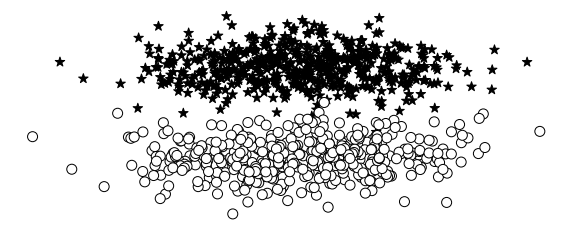

<IPython.core.display.Javascript object>

In [12]:
# Initial Data Plot

seed = 1337

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

x_data, y_truth = get_toy_data(batch_size=1000)

x_data = x_data.data.numpy()
y_truth = y_truth.data.numpy()

left_x = []
right_x = []
left_colors = []
right_colors = []

for x_i, y_true_i in zip(x_data, y_truth):
    color = "black"

    if y_true_i == 0:
        left_x.append(x_i)
        left_colors.append(color)

    else:
        right_x.append(x_i)
        right_colors.append(color)

left_x = np.stack(left_x)
right_x = np.stack(right_x)

_, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.scatter(left_x[:, 0], left_x[:, 1], color=left_colors, marker="*", s=100)
ax.scatter(
    right_x[:, 0],
    right_x[:, 1],
    facecolor="white",
    edgecolor=right_colors,
    marker="o",
    s=100,
)

plt.axis("off")

#### Problem Solving Steps

- Choosing a Model
- Converting the probabilities to discrete classes
- Chossing a loss function
- Choosing an Optimizer

In [13]:
# Instantiating the Adam optimizer

import torch.optim as optim

input_dim = 2
lr = 0.001

perceptron = Perceptron(input_dim=input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr)

<IPython.core.display.Javascript object>

### Putting it Together: Gradient Bases Supervised Learning

_Gradient-Stepping_ Algorithm steps:

- First bookkeeping information such as gradients, stored inside the model object are cleared with a function named `zero_grad()`.
- Then model computes outputs(`y_pred`) given the input data(`x_data`).
- Loss is computed by comparing model outputs(`y_pred`) to intended targets(`y_target`).
- PyTorch loss object(`criterion`) uses `backward()` function to propagate the loss backward through the computational graph and notifies each parameter of its gradient.
- Finally, optimizer(`opt`) instructs the parameters how to update their values knowing the gradient with function named `step()`.

In [14]:
# A Supervised training loop for a perceptron and binary classification
def train_model(
    model,
    x_data_static,
    y_truth_static,
    n_epochs,
    n_batches,
    data_fn,
    loss_fn,
    optimizer,
):
    losses = []
    last_loss = 10.0
    # Each epoch is a complete pass over the training data
    for epoch_i in range(n_epochs):
        # The inner loop is over the batches in the dataset
        for batch_i in range(n_batches):
            # Step 0: Get the data
            x_data, y_target = data_fn(batch_size)

            # Step 1: Clear the gradients
            optimizer.zero_grad()

            # Step 2: Compute the forward pass of the model
            y_pred = model(x_data).squeeze()

            # Step 3: Compute the loss value that we wish to optimizer
            loss = loss_fn(y_pred, y_target)

            # Step 4: Prepagate the loss signal backward
            loss.backward()

            # Step 5: Trigger the optimizer to perform one update
            optimizer.step()

            loss_value = loss.item()
            losses.append(loss_value)

            change = abs(last_loss - loss_value)
            last_loss = loss_value
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
        visualize_results(
            model,
            x_data_static,
            y_truth_static,
            ax=ax,
            epoch=epoch_i,
            title=f"{loss_value}; {change}",
        )
        plt.axis("off")

<IPython.core.display.Javascript object>

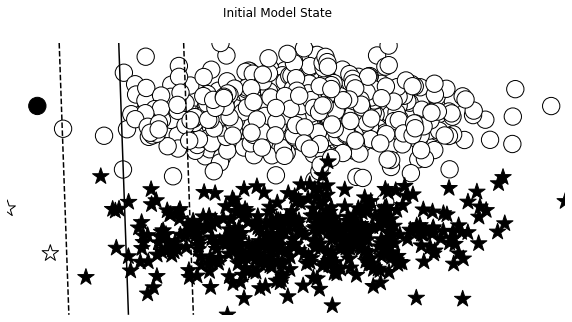

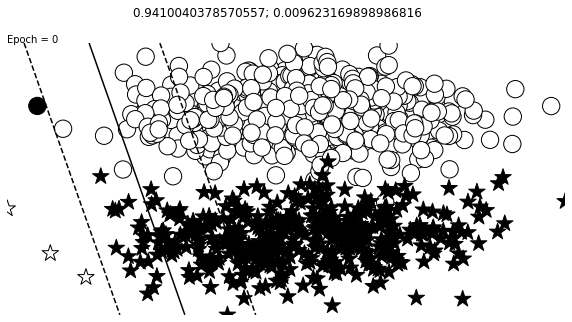

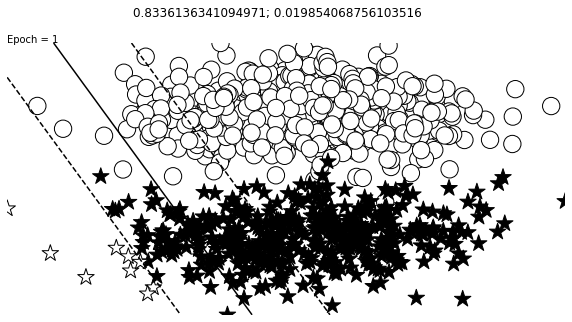

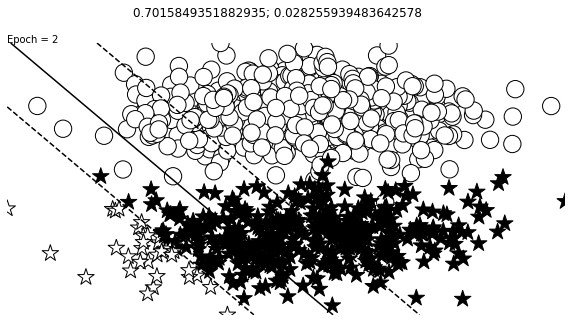

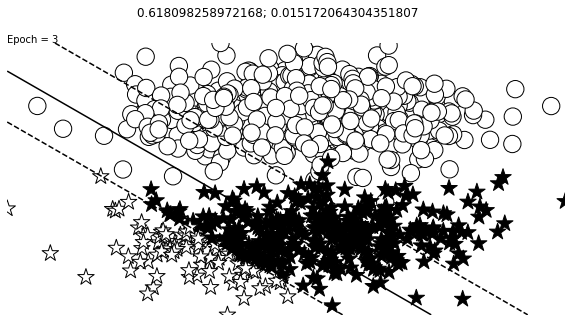

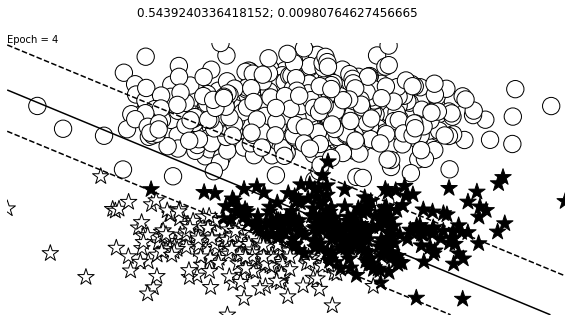

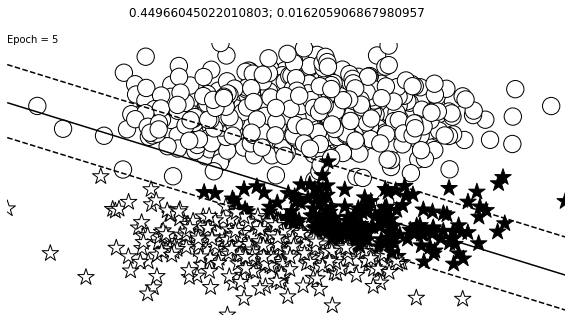

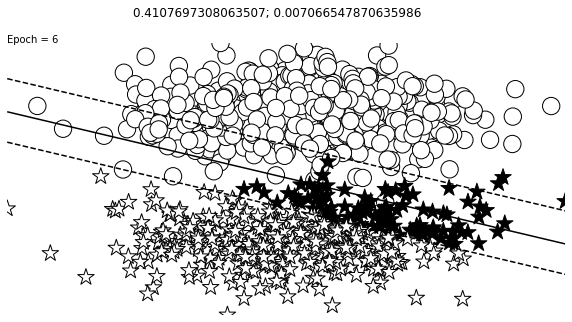

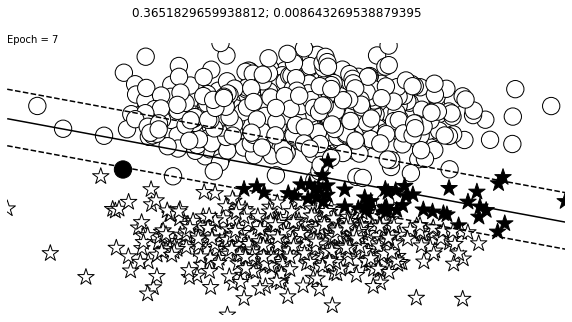

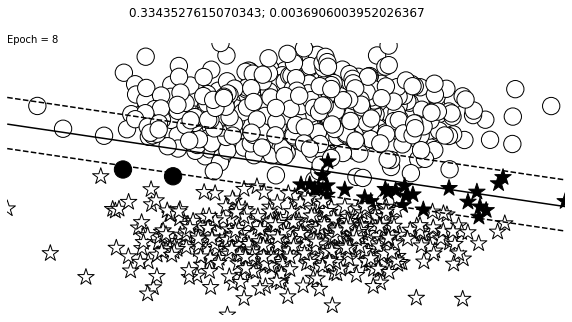

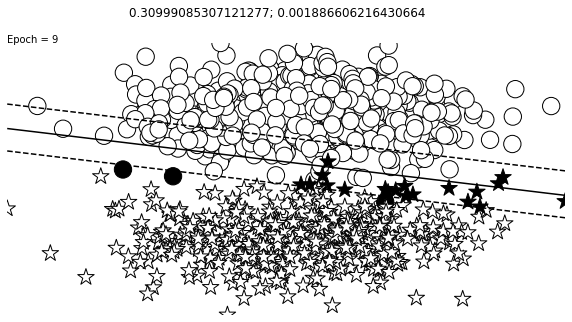

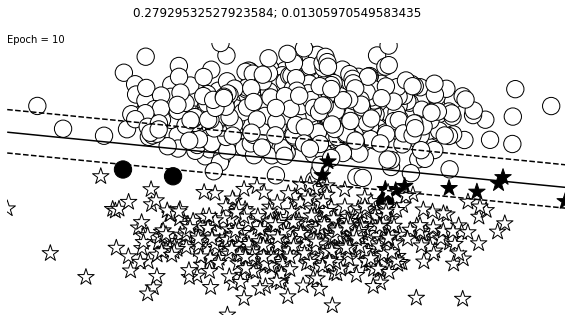

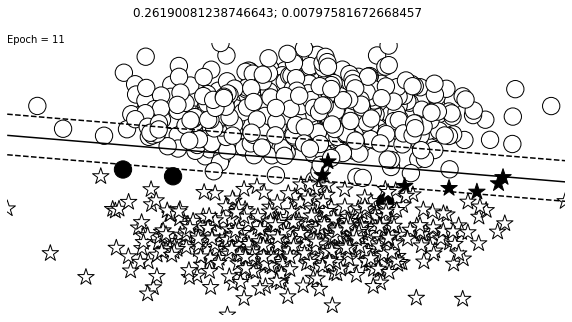

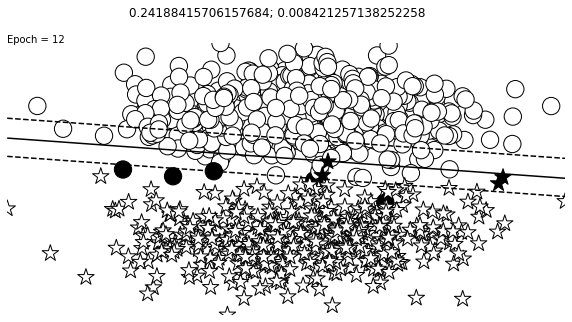

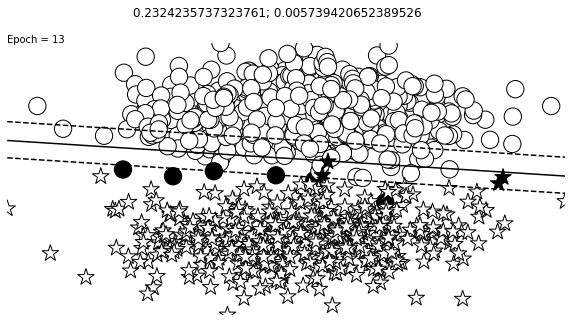

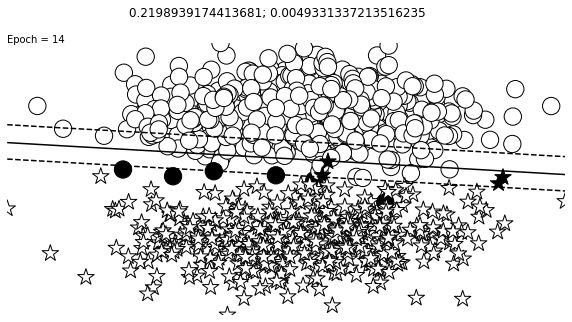

<IPython.core.display.Javascript object>

In [15]:
lr = 0.01
input_dim = 2

batch_size = 1000
n_epochs = 15
n_batches = 5

seed = 1337

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

perceptron = Perceptron(input_dim=input_dim)
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr)
bce_loss = nn.BCELoss()

losses = []

x_data_static, y_truth_static = get_toy_data(batch_size)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
visualize_results(
    perceptron, x_data_static, y_truth_static, ax=ax, title="Initial Model State"
)
plt.axis("off")
# plt.savefig('initial.png')

change = 1.0
last = 10.0
epsilon = 1e-3
epoch = 0

train_model(
    perceptron,
    x_data_static,
    y_truth_static,
    n_epochs,
    n_batches,
    get_toy_data,
    bce_loss,
    optimizer,
)

(-0.3603001832962036, 6.013579845428467, -5.019380569458008, 5.617672443389893)

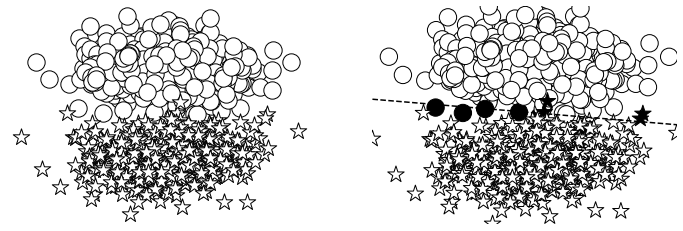

<IPython.core.display.Javascript object>

In [17]:
_, axes = plt.subplots(1, 2, figsize=(12, 4))


axes[0].scatter(
    left_x[:, 0], left_x[:, 1], facecolor="white", edgecolor="black", marker="o", s=300
)
axes[0].scatter(
    right_x[:, 0],
    right_x[:, 1],
    facecolor="white",
    edgecolor="black",
    marker="*",
    s=300,
)
axes[0].axis("off")
visualize_results(
    perceptron, x_data_static, y_truth_static, epoch=None, levels=[0.5], ax=axes[1]
)
axes[1].axis("off")

## Auxiliary Training Concepts

**Correctly Measuring Model Performance: Evaluation Metrics**

- Models are evaludated using one or more _evaluation metrics_.
- Accuracy is simply the fraction of the predictions that were correct on a dataset unseen during trainig.

**Correcrly Measuing Model Performace: Splitting the Dataset**

- Final goal of modeling is to generalize well to true distribution of data.
- Model is said to have generalized better than another model if it reduces error on sample seen in the training data and also samples from the unseen data.
- To accomplish this goal, it is a good practice to aggregate the dataset by class label and then randomly split each set separated by class label into training, validation & test datasets. A common split percentage is to reserve 70% for training, 15% for validation & 15% for testing.

**Knowing When to stop train**

- Most common methods is to use heuristic called _early stopping_.
- It keep track of the performance on the validation dataset for each epoch and terminates of performance no longer improves.
- Number of epochs to wait before terminating the training referred to as the _patience_. The point at which model stops improving is said to be when the model has _converged_.

**Finding the right Hyperparameters**

- A _hyperparameter_ is any model setting that affetcs the number of parameters in the model and values by the parameters.
- Some examples are loss function, optimzer, learning rate of optimizer, layer sizes, patience for early stopping and regularization decisions.

**Regularization**

- _L2 regularization_ is called smoothness constraint whereas _L1 regularization_ is used to encourage sparser solutions where most of the model parameters values are close to zero.

## Example: Classifying Sentiment of Restaurant Reviews

Following pattern is used in the book for tranforming text data into vectorized form:

- _Vocabulary_ coordinates the integer-to-token mappings. It is used for mapping the text tokens to integers and for mapping the class labels to integers.
- _Vectorizer_ encapsulates the vocabularies and it is responsible for ingesting string data and converting it to numerical vectors that will be used in the training routine.
- _DataLoader_ is used to group and collate the individual vectorized data points into minibatches.

### The Yelp Review Dataset

In [18]:
import collections
import numpy as np
import pandas as pd
import re

from argparse import Namespace

<IPython.core.display.Javascript object>

In [21]:
args = Namespace(
    raw_train_dataset_csv="../data/yelp/raw_train.csv",
    raw_test_dataset_csv="../data/yelp/raw_test.csv",
    proportion_subset_of_train=0.1,
    train_proportion=0.7,
    val_proportion=0.15,
    test_proportion=0.15,
    output_munged_csv="../data/yelp/reviews_with_splits_lite.csv",
    seed=1337,
)

<IPython.core.display.Javascript object>

In [25]:
train_reviews = pd.read_csv(
    args.raw_train_dataset_csv,
    header=None,
    names=["rating", "review"],
)
train_reviews.head()

rating                                             review
0       1  Unfortunately, the frustration of being Dr. Go...
1       2  Been going to Dr. Goldberg for over 10 years. ...
2       1  I don't know what Dr. Goldberg was like before...
3       1  I'm writing this review to give you a heads up...
4       2  All the food is great here. But the best thing...

<IPython.core.display.Javascript object>

In [26]:
train_reviews.rating.value_counts()

1    7349
2    6770
Name: rating, dtype: int64

<IPython.core.display.Javascript object>

In [29]:
# Minimally cleaning the data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"([.,!?])", r" \1 ", text)
    text = re.sub(r"[^a-zA-Z.,!?]", r" ", text)
    return text

<IPython.core.display.Javascript object>

In [31]:
text = """
terrible place to work for i just heard a story of them find a girl over her biological father coming in there who she hadn t seen in years she said hi to him which upset his wife and they left she finished the rest of her day working fine the next day when she went into work they fired over that situation . i for one and boycotting texas roadhouse because any place that could be that cruel to their staff does not deserve my business . . . yelp wants me to give them a star but i don t believe they deserve it
"""
preprocess_text(text)

text = " hours , minutes total time for an extremely simple physical . stay away unless you have hours to waste ! ! !"
preprocess_text(text)

' hours  ,  minutes total time for an extremely simple physical  .  stay away unless you have hours to waste  !   !   ! '

<IPython.core.display.Javascript object>

### Understaing PyTorch's Dataset Representation

In [112]:
# A PyTorch Dataset Class for the Yelp Review Dataset

from torch.utils.data import Dataset


class ReviewDataset(Dataset):
    def __init__(self, review_df, vectorizer):
        """
        Args:
            review_df (pandas.DataFrame): the dataset
            vectorizer (ReviewVectorizer): vectorizer instantiated from dataset
        """
        self.review_df = review_df
        self._vectorizer = vectorizer

        self.train_df = self.review_df[self.review_df.split == "train"]
        self.train_size = len(self.train_df)

        self.val_df = self.review_df[self.review_df.split == "val"]
        self.val_size = len(self.val_df)

        self.test_df = self.review_df[self.review_df.split == "test"]
        self.test_size = len(self.test_df)

        self._lookup_dict = {
            "train": (self.train_df, self.train_size),
            "val": (self.val_df, self.val_size),
            "test": (self.test_df, self.test_size),
        }

        self.set_split("train")

    @classmethod
    def load_dataset_and_make_vectorizer(cls, review_csv):
        """
        Load dataset and make a new vectorizer from scratch.

        Args:
            review_csv (str): location of the dataset
        Returns:
            an instance of ReviewDataset
        """
        review_df = pd.read_csv(review_csv)
        return cls(review_df, ReviewVectorizer.from_dataframe(review_df))

    def get_vectorizer(self):
        """
        Returns the vectorizer
        """
        return self._vectorizer

    def set_split(self, split="train"):
        """
        Selects the splits in the dataset using a column in the dataframe.

        Args:
            split (str): one of 'train', 'val', or 'test'
        """
        self._train_split = split
        self._target_df, self._target_size = self._lookup_dict[split]

    def __len__(self):
        return self._target_size

    def __getitem__(self, index):
        """
        The primary entry point method for PyTorch datasets.

        Args:
            index (int): The index to the data point.
        Returns:
            a dict of the data point's feature(x_data) and label(y_target)
        """
        row = self._target_df.iloc[index]
        review_vector = self._vectorizer.vectorize(row.review)
        rating_index = self._vectorizer.vectorize(row.review)
        return {"x_data": review_vector, "y_target": rating_index}

    def get_num_batches(self, batch_size):
        """
        Given a batch_size, return the number of batches in the dataset.

        Args:
            batch_size (int)
        Returns:
            number of batches in the dataset
        """
        return len(self) // batch_size

<IPython.core.display.Javascript object>

### The Vocabulary, the Vectorizer and the DataLoader

In [113]:
class Vocabulary(object):
    """
    Class to process text and extract Vocabulary for mapping.
    """

    def __init__(self, token_to_idx=None, add_unk=True, unk_token="<UNK>"):
        """
        Args:
            token_to_idx (dict): a pre-exiting map of tokens to indices
            add_unk (bool): a flag that indicates whether to add the UNK token
            unk_token (str): the UNK token to add into the Vocabulary
        """
        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx

        self._idx_to_token = {idx: token for token, idx in self._token_to_idx.items()}
        self._add_unk = add_unk
        self._unk_token = unk_token

        self.unk_index = -1
        if add_unk:
            self.unk_index = self.add_token(unk_token)

    def to_serializable(self):
        """
        Returns a dictionary that can be serialized.
        """
        return {
            "token_to_idx": self._token_to_idx,
            "add_unk": self._add_unk,
            "unk_token": self._unk_token,
        }

    @classmethod
    def from_serializable(cls, contents):
        """
        Instantiates the Vocabulary from a serialized dictionary.
        """
        return cls(**contents)

    def add_token(self, token):
        """
        Update mapping dicts based on the token.

        Args:
            token (str): the item to add into the Vocabulary
        Returns:
            index (int): the integer corresponding to the token
        """
        if token in self._token_to_idx:
            index = self._token_to_idx[token]
        else:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index

    def lookup_token(self, token):
        """
        Retrieve the index associated with the token or the UNK index
        if token isn't present.

        Args:
            token (str): the token to look up.
        Returns:
            index (int): the index corresponding to the token
        """
        if self._add_unk:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]

    def lookup_index(self, index):
        """
        Return the token associated with the index

        Args:
            index (int): the index to look up
        Returns:
            token (str): the token cooresponding to the index
        Raises:
            KeyError: if the index is not in the Vocabulary
        """
        if index not in self._idx_to_token:
            raise KeyError(f"the index {index} is not in the Vocabulary.")
        return self._idx_to_token[index]

    def __str__(self):
        return f"<Vocabulary(size={len(self)})>"

    def __len__(self):
        return len(self._token_to_idx)

<IPython.core.display.Javascript object>

In [123]:
from collections import Counter
import string


class ReviewVectorizer(object):
    """
    The Vectorizer which coordinates the Vocabularies and puts them to use.
    """

    def __init__(self, review_vocab, rating_vocab):
        """
        Args:
            review_vocab (Vocabulary): maps words to integers
            rating_vocab (Vocabulary): maps class labels to integers
        """
        self.review_vocab = review_vocab
        self.rating_vocab = rating_vocab

    def vectorize(self, review):
        """
        Create a collapsed one-hot vector for the review

        Args:
            review (str): the review
        Returns:
            one_hot (np.ndarray): the collapsed one-hot encoding
        """
        one_hot = np.zeros(len(self.review_vocab), dtype=np.float32)

        for token in review.split(" "):
            if token not in string.punctuation:
                one_hot[self.review_vocab.lookup_token(token)] = 1
        return one_hot

    @classmethod
    def from_dataframe(cls, review_df, cutoff=25):
        """
        Instantiate the vectorizer from the dataset dataframe

        Args:
            review_df (pandas.DataFrame): the review dataset
            cutoff (int): the parameter for frequency-based filtering
        Returns:
            an instance of the ReviewVectorizer
        """
        review_vocab = Vocabulary(add_unk=True)
        rating_vocab = Vocabulary(add_unk=False)

        # Add ratings
        for rating in sorted(review_df.rating):
            rating_vocab.add_token(rating)

        # Add top words if count > provided count/cutoff
        word_counts = Counter()
        for review in review_df.review:
            for word in review.split(" "):
                if word not in string.punctuation:
                    word_counts[word] += 1
        for word, count in word_counts.items():
            if count > cutoff:
                review_vocab.add_token(word)

        return cls(review_vocab, rating_vocab)

    @classmethod
    def from_serializable(cl, contents):
        """
        Intantiate a ReviewVectorizer from a serializable dictionary

        Args:
            contents (dict): the serializable dictionary
        Returns:
            an instance of the ReviewVectorizer class
        """
        review_vocab = Vocabulary.from_serializable(contents["review_vocab"])
        rating_vocab = Vocabulary.from_serializable(contents["rating_vocab"])
        return cls(review_vocab=review_vocab, rating_vocab=rating_vocab)

    def to_serializable(self):
        """
        Create the serializable dictionary for caching

        Returns:
            contents (dict): the serializable dictionary
        """
        return {
            "review_vocab": self.review_vocab.to_serializable(),
            "rating_vocab": self.rating_vocab.to_serializable(),
        }

<IPython.core.display.Javascript object>

In [124]:
from torch.utils.data import DataLoader


def generate_batches(dataset, batch_size, shuffle=True, drop_last=True, device="cpu"):
    """
    A generator function which wraps the PyTorch DataLoader.
    It will ensure each tensor is on the write device location.
    """
    dataloader = DataLoader(
        dataset=dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last
    )

    for data_dict in dataloader:
        out_data_dict = {}
        for name, tensor in data_dict.items():
            out_data_dict[name] = data_dict[name].to(device)
        yield out_data_dict

<IPython.core.display.Javascript object>

In [125]:
review_dataset = ReviewDataset.load_dataset_and_make_vectorizer(
    "../data/yelp/reviews_with_splits_lite.csv"
)

<IPython.core.display.Javascript object>

In [126]:
len(review_dataset._vectorizer.review_vocab), len(
    review_dataset._vectorizer.rating_vocab
), review_dataset.get_num_batches(10)

(8945, 2, 3920)

<IPython.core.display.Javascript object>

In [127]:
batches = generate_batches(review_dataset, 10)
for batch in batches:
    print(batch)
    break

{'x_data': tensor([[1., 0., 1.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 1.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.]]), 'y_target': tensor([[1., 0., 1.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 1.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.]])}


<IPython.core.display.Javascript object>

In [128]:
text = " hours , minutes total time for an extremely simple physical . stay away unless you have hours to waste ! ! ! microbes"
one_hot = review_dataset._vectorizer.vectorize(text)
for token in text.split(" "):
    if token not in string.punctuation:
        try:
            print(
                f"Index of {token.strip()} is {review_dataset._vectorizer.review_vocab.lookup_token(token)}"
            )
        except KeyError:
            print(f"{token} is not found in vocab.")

Index of hours is 73
Index of minutes is 74
Index of total is 75
Index of time is 76
Index of for is 5
Index of an is 77
Index of extremely is 78
Index of simple is 79
Index of physical is 80
Index of stay is 81
Index of away is 82
Index of unless is 83
Index of you is 84
Index of have is 85
Index of hours is 73
Index of to is 3
Index of waste is 86
Index of microbes is 0


<IPython.core.display.Javascript object>